In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from VibTesting import VibTesting

### Measurement

In [4]:
# List of sensor serial numbers - option 1
#sensor_list = ['45250', 'LW312598', 'LW168022', '177269', '1669', 'LW184270', '4010', '4009', 'LW191475']

In [5]:
# dictionary of sensor serial numbers with lists of directions as values - option 2
sensor_list = {'34788':['/'], '4009':['z'], 'LW355978': ['z'], '371918':['z'], '370730':['z'],
               '371919':['z'], '371917':['z'], 'LW184270':['z'], '359598':['z']}

In [6]:
#sensor_list = ['34788', '']

In [9]:
# Vibrational testing class instance
imp_testing = VibTesting(task_name='My_task',
                            sensor_xlsx='Merilna oprema_updated.xlsx', sensor_list=sensor_list,
                           sampling_rate=51200, samps_per_chn=51200,
                           acquisition_time=1, no_impacts=3, trigger_level=5)

Repeated task name: task name changed to My_task_
force
1z
2z
3z
4z
5z
6z
7z
8z
8z


Measurement point 3z


  0%|          | 0/3 [00:00<?, ?it/s]

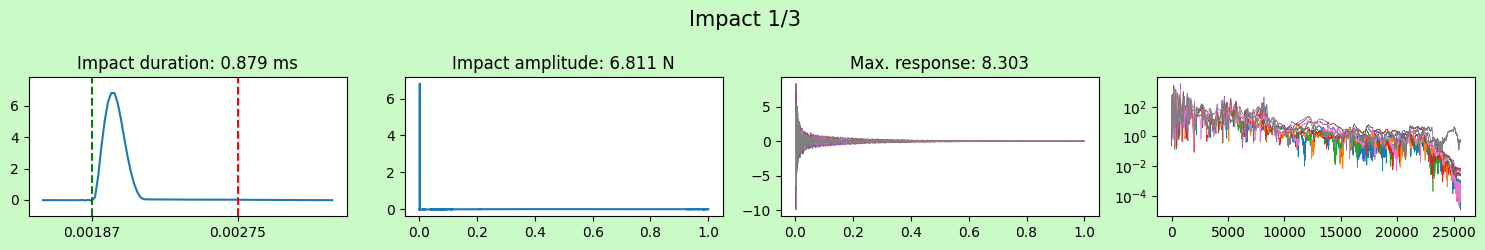

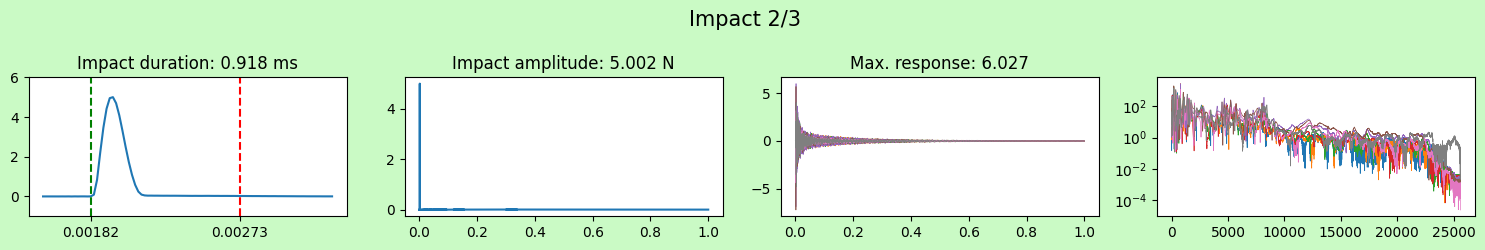

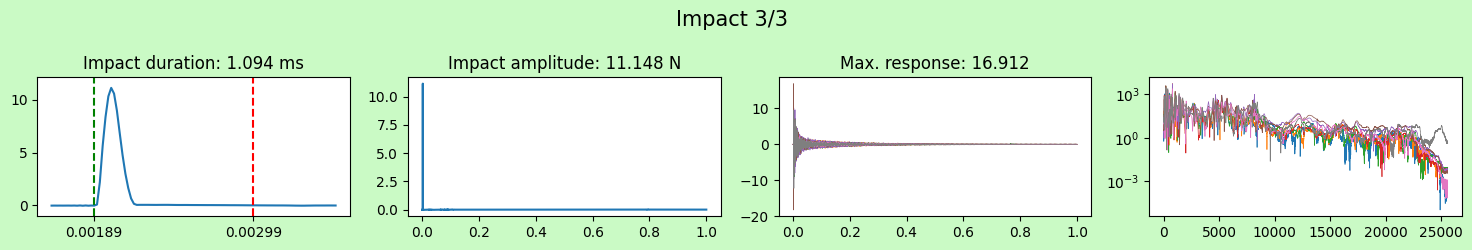

GridspecLayout(children=(SelectMultiple(index=(0, 1, 2), layout=Layout(grid_area='widget001', width='200px'), …

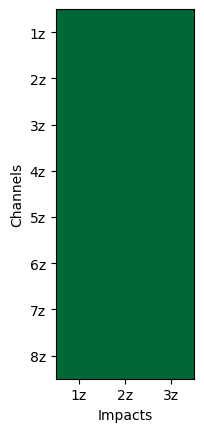

Output()

In [ ]:
channels = ['1z', '2z', '3z', '4z', '5z', '6z', '7z', '8z']
impacts = ['1z', '2z', '3z']
channel_factors = [1,1,1,1,1,1,1,1]
impact_factors = [-1, 1, -1]
# FRF for the current measurement are calculated and saved when SAVE button is pressed!!
imp_testing.start_admittance_measurement(channels, impacts, channel_factors, impact_factors, save_to='file1') # save_to arument is optional (file name can be chosen later)

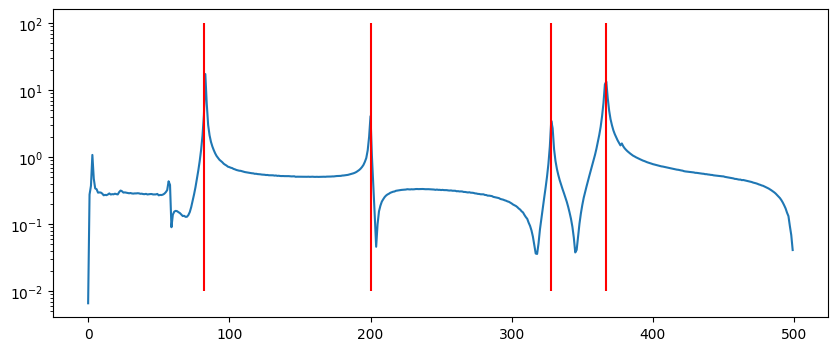

In [65]:
lf = [82, 200, 328, 367]
plt.figure(figsize=(10,4))
plt.semilogy(abs(imp_testing.Y[:500, 0, 0]))
plt.vlines(lf, 1e-2, 1e2, color='r')

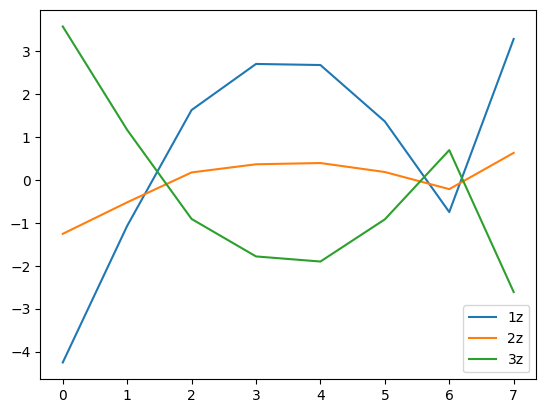

In [73]:
imp_ , lf_= 2, 82
for imp_ in range(3):
    Y_imp = imp_testing.Y[:, :, imp_]
    plt.plot([np.abs(Y_imp[lf_, i])* np.sign(np.real(Y_imp[lf_, i])) for i in range(Y_imp.shape[1])], label=impacts[imp_])
plt.legend()

In [21]:
to_do = [_ for _ in imp_testing.dof_data['progress'] if imp_testing.dof_data['progress'][_] == 0]
list(set([_[2:] for _ in to_do]))

['3z', '2z', '1z']

In [9]:
# close the task
imp_testing.close_task()

### ImpactTesting class attributes

In [10]:
# List of connected devices
print(imp_testing.device_list)

['cDAQ6', 'cDAQ6Mod1', 'SimDev1']


In [11]:
# All channels in the task
print(imp_testing.all_channels)

['force', '1x', '1z']


In [12]:
# Force channel index
imp_testing.force_chn_ind

0

In [13]:
# Measurement results - shape: (measurements, channels, samples)
results = imp_testing.measurement_array
results.shape

(3, 3, 51200)

In [14]:
# measurement information
print(imp_testing.meas_info)

{'Sampling rate': 51200, 'Acquisiton time': 1, 'Used devices': ['cDAQ6', 'cDAQ6Mod1', 'SimDev1'], 'Channels': ['force', '1x', '1z'], 'Force channel index': 0}
